In [167]:
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing, cross_validation
from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing, cross_validation
from sklearn.model_selection import cross_val_score,KFold
from matplotlib import pyplot as plt
import operator
from collections import Counter

In [2]:
dataset = datasets.load_breast_cancer()
print(dataset.data.shape)
print(dataset.target.shape)

(569, 30)
(569,)


In [186]:
dataset.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0,

In [224]:
X_Train, X_Test, Y_Train, Y_Test = cross_validation.train_test_split(dataset.data, dataset.target, test_size = 0.4)

In [225]:
k=1
klist=[]
scorelist = []
while(k<16):
    KNN = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(KNN, X_Train, Y_Train,cv=KFold(n_splits=5,shuffle=True))
    scorelist.append((score).mean())
    klist.append(k)
    k=k+1
high_k = klist[scorelist.index(max(scorelist))]
print(high_k)
KNN = KNeighborsClassifier(n_neighbors=high_k)
KNN.fit(X_Train,Y_Train)
print(KNN.score(X_Test,Y_Test))
Y_scikit = KNN.predict(X_Test)

7
0.925438596491


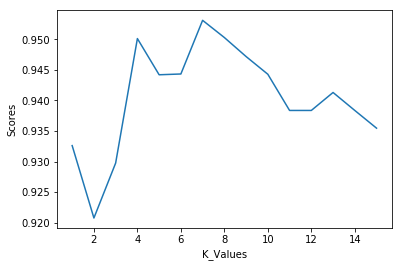

In [227]:
plt.plot(klist,scorelist)
plt.xlabel('K_Values')
plt.ylabel('Scores')
plt.show()

In [228]:
def kNN(X_Train,Y_Train,X_Test,k):
    distances = []
    for i in range(X_Train.shape[0]):
        d = ((X_Train[i]-X_Test)**2).sum()
        distances.append((d,i))
    distances.sort(key = operator.itemgetter(0))
    Y_Pred = knearest(distances,Y_Train,k)
    return Y_Pred

In [229]:
def knearest(distances,Y_Train,k):
    topk = []
    yop = []
    for i in range(k):
        topk.append(distances[i])
    for i in topk:
        yop.append(Y_Train[i[1]])
    most = Counter(yop).most_common(1)
    return most[0][0]

In [230]:
Y_Pred = []
for i in range(X_Test.shape[0]):
    Y_Pred.append(kNN(X_Train,Y_Train,X_Test[i],7))
accuracy_score(Y_Test, Y_Pred)

0.92543859649122806